## Beamline

In [1]:
from elements import *
from beamline import Beamline
from beam import Bunch
from matplotlib import pyplot as plt

### Construct Beamline List

In [2]:
d1 = Drift("d1", "drift", 5, aperture=['circular', 1e-1])
b1 = Sbend("b1", "sbend", 1.5, 22.5, aperture=['circular', 1e-1])
qf = Quadrupole("qf", "quadrupole", 0.4, 1.2, aperture=['circular', 1e-1])
qd = Quadrupole("qd", "quadrupole", 0.4, -1.2, aperture=['circular', 1e-1])
m1 = Marker("m1", "marker", aperture=['circular', 1e-1])

In [3]:
fodo_list = [b1]

In [4]:
fodo_list[0].element_properties["type"]

'sbend'

In [5]:
fodo = Beamline("fodo", fodo_list)

In [6]:
fodo.get_num_beamline_elements()

1


In [7]:
fodo.print_beamline()

   b1      sbend  1.500 22.500  1.500


In [8]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [9]:
particles = bunch.generate_transverse_matched_beam_distribution(1)
x = particles[0, :]
xp = particles[1, :]
y = particles[2, :]

seed num: 1
[-0.00297669  0.00039507  0.00094624 ...  0.00100198 -0.00260023
 -0.0015643 ]


In [10]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0
[-0.01616345 -0.00891153 -0.00340658 ...  0.00429947 -0.00789731
 -0.01470608]


In [11]:
fodo.propagate_beamline(bunch)

In [12]:
new_particles = bunch.state
nx = new_particles[0,:]
nxp = new_particles[1,:]
ny = new_particles[2,:]

In [13]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 1.5
[-0.01928423 -0.00765569 -0.00176411 ...  0.00543683 -0.01109704
 -0.01587325]


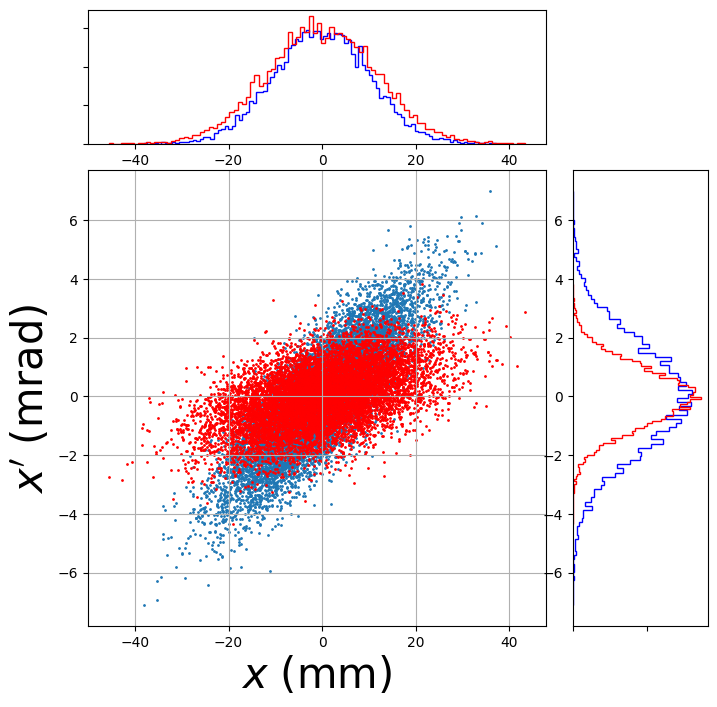

In [14]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

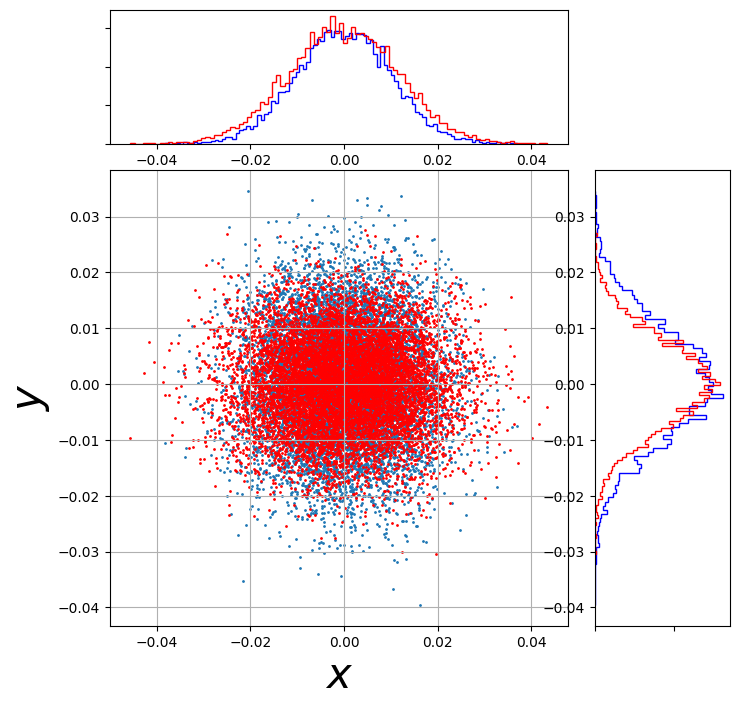

In [15]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

## Element and Beamline Slicing

## Element Slicing

In [16]:
from elements import *
from beamline import Beamline
from beam import Bunch
from matplotlib import pyplot as plt

In [17]:
d1 = Drift("d1", "drift", 5, aperture=['circular', 1e-1])

In [18]:
new_element = d1.slice_element(2)

In [19]:
for element in new_element:
    element.print_element_properties()

element name     : d1_0
element type     : drift
element length   : 2.5
element strength : 0
element aperture : ['circular', 0.1]
element name     : d1_1
element type     : drift
element length   : 2.5
element strength : 0
element aperture : ['circular', 0.1]


### Beamline Slicing

In [20]:
d1 = Drift("d1", "drift", 5, aperture=['circular', 1e-1])
b1 = Sbend("b1", "sbend", 1.5, 22.5, aperture=['circular', 1e-1])
qf = Quadrupole("qf", "quadrupole", 0.4, 1.2, aperture=['circular', 1e-1])
qd = Quadrupole("qd", "quadrupole", 0.4, -1.2, aperture=['circular', 1e-1])
m1 = Marker("m1", "marker", aperture=['circular', 1e-1])
slice_n = 4 

In [21]:
fodo_list = [b1]

In [22]:
fodo_list[0].element_properties["type"]

'sbend'

In [23]:
fodo = Beamline("fodo", fodo_list)

In [24]:
fodo.get_num_beamline_elements()

1


In [25]:
fodo.print_beamline()

   b1      sbend  1.500 22.500  1.500


In [26]:
fodo.slice_beamline(slice_n)

In [27]:
fodo.print_sliced_beamline()
# print(len(sliced_lattice()))

 b1_0      sbend  0.375  5.625  0.375
 b1_1      sbend  0.375  5.625  0.750
 b1_2      sbend  0.375  5.625  1.125
 b1_3      sbend  0.375  5.625  1.500


In [28]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [29]:
particles = bunch.generate_transverse_matched_beam_distribution(1)
x = particles[0, :]
xp = particles[1, :]
y = particles[2, :]

seed num: 1
[-0.00297669  0.00039507  0.00094624 ...  0.00100198 -0.00260023
 -0.0015643 ]


In [30]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0
[-0.01616345 -0.00891153 -0.00340658 ...  0.00429947 -0.00789731
 -0.01470608]


In [31]:
fodo.propagate_sliced_beamline(bunch,slice_n)



element name     : b1_0
element type     : sbend
element length   : 0.375
element strength : 5.625
element aperture : ['circular', 0.1]
None
element name     : b1_1
element type     : sbend
element length   : 0.375
element strength : 5.625
element aperture : ['circular', 0.1]
None
element name     : b1_2
element type     : sbend
element length   : 0.375
element strength : 5.625
element aperture : ['circular', 0.1]
None
element name     : b1_3
element type     : sbend
element length   : 0.375
element strength : 5.625
element aperture : ['circular', 0.1]
None


In [32]:
new_particles = bunch.state
nx = new_particles[0,:]
nxp = new_particles[1,:]
ny = new_particles[2,:]

In [33]:
bunch.print_bunch_properties()

number of macro particles : 9996
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 1.5
[-0.04599041 -0.02114088 -0.0064352  ...  0.01266855 -0.02484263
 -0.03947541]


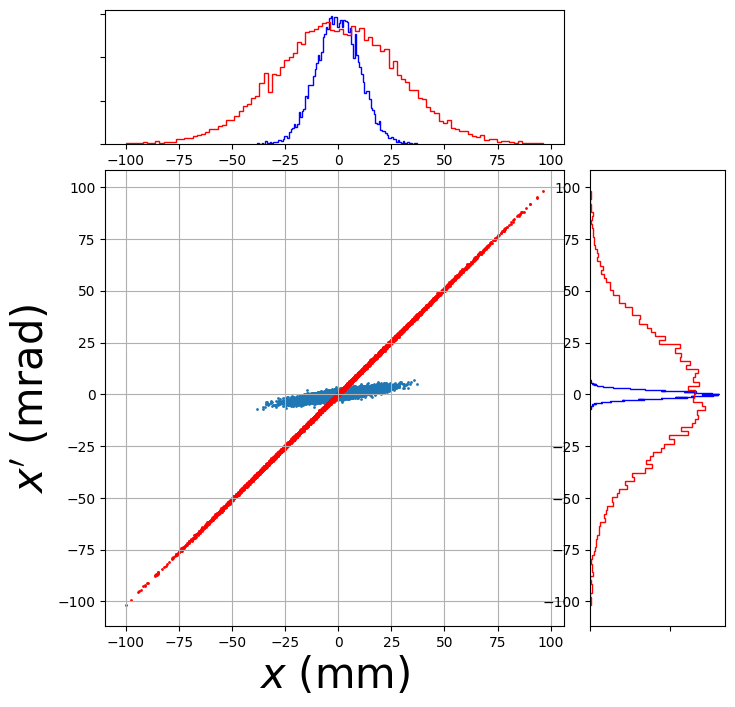

In [34]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

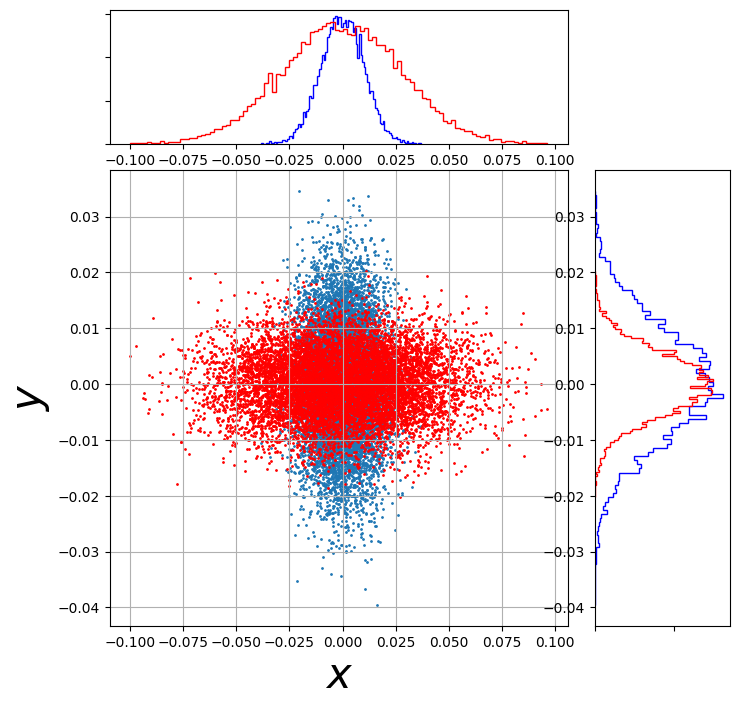

In [35]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()